In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis , skew

In [72]:
df = pd.read_csv('http://ishelp.info/data/insurance.csv')

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [74]:
df.shape

(1338, 7)

In [75]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [76]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [77]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [78]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [83]:
df.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [81]:
df.age.value_counts()

age
18    69
19    68
46    29
52    29
50    29
47    29
48    29
51    29
45    29
20    29
24    28
27    28
28    28
25    28
23    28
49    28
54    28
53    28
22    28
21    28
26    28
31    27
41    27
44    27
43    27
42    27
29    27
30    27
40    27
32    26
33    26
57    26
34    26
55    26
56    26
35    25
58    25
37    25
59    25
39    25
36    25
38    25
62    23
60    23
63    23
61    23
64    22
Name: count, dtype: int64

In [84]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [85]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [88]:
df = df.rename(columns={'age':'Age', 'bmi':'BMI','sex':'Sex','smoker':'Smoker','region':'Region','charges':'Charges'})

In [89]:
df.columns

Index(['Age', 'Sex', 'BMI', 'children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [91]:
skew(df.Age, bias=False)

np.float64(0.055672515652991854)

In [92]:
df.loc[df.duplicated()]

,Age,Sex,BMI,children,Smoker,Region,Charges
581,19,male,30.59,0,no,northwest,1639.5631


In [93]:
df.loc[df.duplicated(subset='Age')]

,Age,Sex,BMI,children,Smoker,Region,Charges
8,37,male,29.830,2,no,northeast,6406.41070
15,19,male,24.600,1,no,southwest,1837.23700
17,23,male,23.845,0,no,northeast,2395.17155
18,56,male,40.300,0,no,southwest,10602.38500
20,60,female,36.005,0,no,northeast,13228.84695
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [96]:
df.query('Region=="northwest"')

,Age,Sex,BMI,children,Smoker,Region,Charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1324,31,male,25.935,1,no,northwest,4239.89265
1333,50,male,30.970,3,no,northwest,10600.54830


In [102]:
df.loc[~df.duplicated(subset=['Charges'])]\
.reset_index(drop=True)

,Age,Sex,BMI,children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


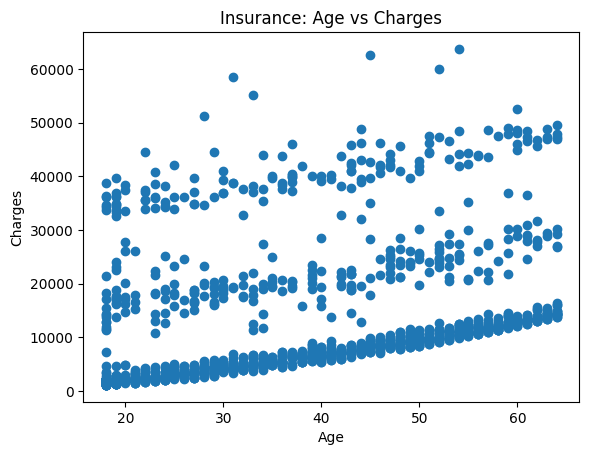

In [103]:
plt.scatter(df.Age,df.Charges)
plt.title('Insurance: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

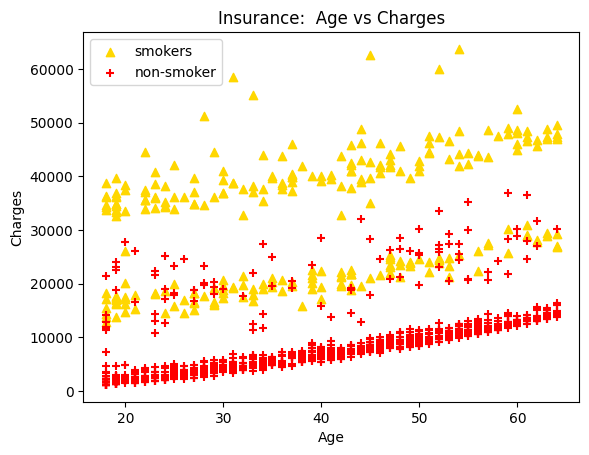

In [108]:
df_smoker = df[df['Smoker']=='yes']
df_nonsmoker = df[df['Smoker']=='no']
plt.scatter(df_smoker.Age,df_smoker.Charges,label='smokers', color = 'gold', marker='^')
plt.scatter(df_nonsmoker.Age,df_nonsmoker.Charges,label='non-smoker', color = 'red', marker='+')
plt.title('Insurance:  Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [109]:
df.columns

Index(['Age', 'Sex', 'BMI', 'children', 'Smoker', 'Region', 'Charges'], dtype='object')

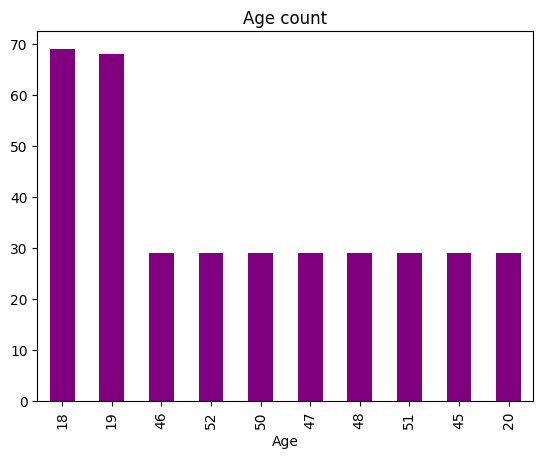

In [121]:
df['Age'].value_counts()\
.head(10)\
.plot(kind='bar', title = 'Age count', color = 'purple');

Text(0.5, 0, 'Age')

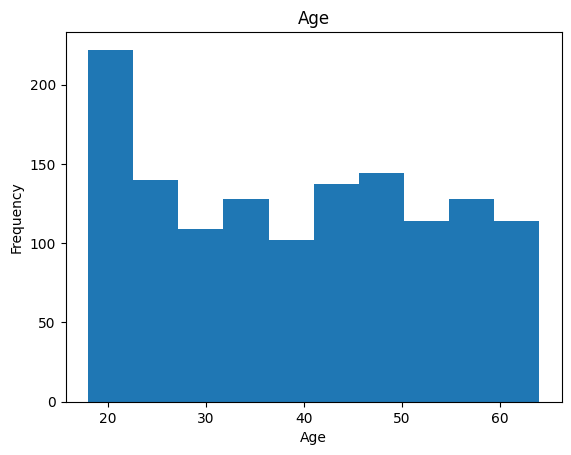

In [125]:
ax = df['Age'].plot(kind='hist', bins = 10, title = 'Age')
plt.xlabel('Age')

<Axes: xlabel='Age', ylabel='Charges'>

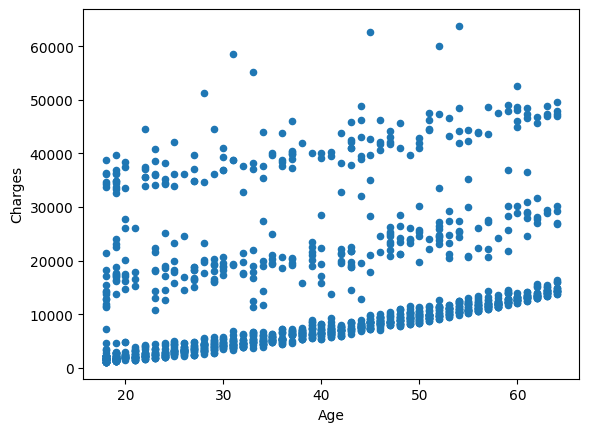

In [126]:
df.plot(kind='scatter', x='Age', y='Charges')

<Axes: xlabel='Age', ylabel='Charges'>

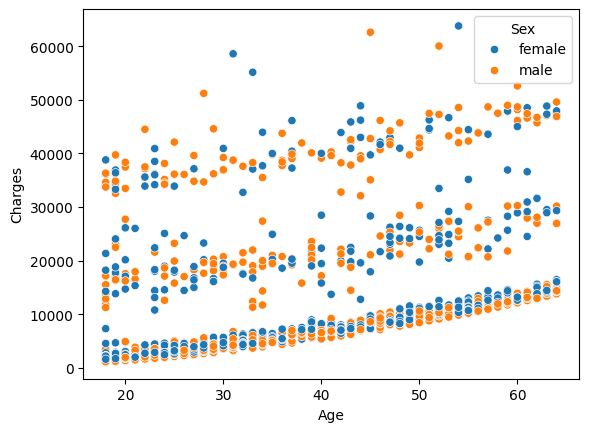

In [127]:
sns.scatterplot(x='Age', y='Charges', data=df, hue='Sex')

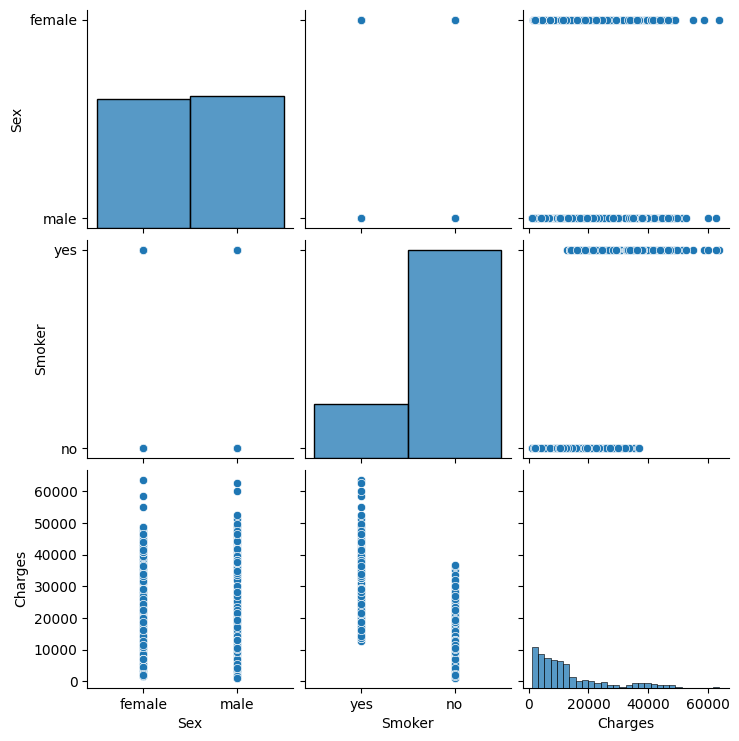

In [135]:
sns.pairplot(df, vars=['Sex','Smoker', 'Charges'])

In [137]:
df.columns

Index(['Age', 'Sex', 'BMI', 'children', 'Smoker', 'Region', 'Charges'], dtype='object')

In [138]:
df_corr = df[['BMI','Charges','Age','children']].dropna().corr()

In [139]:
df_corr

,BMI,Charges,Age,children
BMI,1.000000,0.198341,0.109272,0.012759
Charges,0.198341,1.000000,0.299008,0.067998
Age,0.109272,0.299008,1.000000,0.042469
children,0.012759,0.067998,0.042469,1.000000


<Axes: >

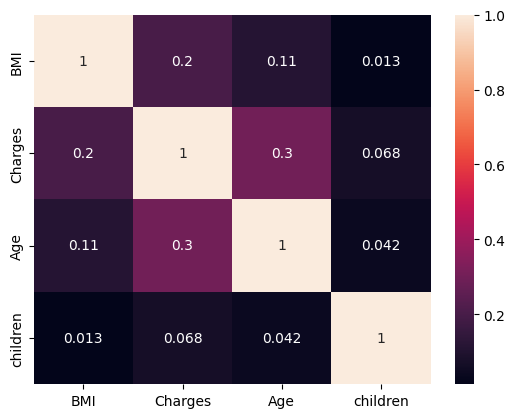

In [140]:
sns.heatmap(df_corr, annot=True)